<a href="https://colab.research.google.com/github/AvinkaRizky/DataMining_Avinka/blob/main/Avinka_049_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS DATA PADA MOBIL BEKAS**



#**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/AvinkaRizky/DataMining_Avinka/main/mobilbekas.csv')

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset data mobil bekas adalah untuk menyediakan informasi yang menyeluruh dan juga terstruktur kepada berbagai pemangku kepentingan dalam industri otomotif. Melalui analisis mendalam terhadap tren pasar, perilaku konsumen, harga, dan performa mobil bekas, dataset ini memungkinkan pengembangan strategi pemasaran yang lebih efektif, penyesuaian harga yang tepat, identifikasi peluang investasi, serta pemahaman yang lebih baik tentang dinamika pasar untuk pengambilan keputusan yang cerdas. Dengan demikian, dataset data mobil bekas berperan penting dalam mendukung pertumbuhan bisnis yang berkelanjutan dan adaptasi terhadap perubahan dalam industri otomotif.



##**Assess Situation**

Situasi yang mendasari adalah karena kompleksitas dan dinamika pasar otomotif yang terus berubah. Sebagai industri yang dipengaruhi oleh banyak faktor, seperti tren ekonomi, teknologi, dan preferensi konsumen, pemangku kepentingan dalam industri otomotif perlu memiliki akses ke informasi yang mendalam dan terstruktur untuk dapat membuat keputusan yang tepat.

##**Data Mining Goals**

Untuk menyediakan informasi yang menyeluruh dan juga memahami tren pasar dan perilaku konsumen dalam industri otomotif. Hal ini dapat mencakup identifikasi preferensi konsumen, popularitas model tertentu, dan pola pembelian yang mungkin mempengaruhi keputusan pemasaran.

##**Project Plan**

Awalnya akan mengumpulkan data yang relevan dari berbagai sumber termasuk situs web penjualan mobil, database dealer, dan sumber data pihak ketiga. Selanjutnya, analisis data untuk mengidentifikasi pola-pola dan hubungan antara variabel-variabel yang ada.hasil analisis dan model yang dikembangkan akan digunakan untuk merancang strategi pemasaran yang lebih efektif dan pengambilan keputusan yang lebih tepat dalam penjualan mobil bekas.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset ini didapat dari kaggle, dengan judul Dataset Mobil Bekas yang juga sudah di upload pada github dengan link: https://raw.githubusercontent.com/AvinkaRizky/DataMining_Avinka/main/mobilbekas.csv


In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/AvinkaRizky/DataMining_Avinka/main/mobilbekas.csv')
df.head()

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin
0,1,Mitsubishi,1870,290000000,Manual,27499,Petrol/Gasoline/Bensin,1800000,28,1.8
1,2,Honda civic type R,2022,400000000,Manual,20000,Diesel/Solar,150000,25,1.2
2,3,Toyota Innova V,2017,370000000,Manual,5000000,Petrol/Gasoline/Bensin,2000000,28,1.8
3,4,Toyota Agya,2020,136000000,Manual,24089,Petrol/Gasoline/Bensin,1725250,20,1.0
4,5,Toyota Agya,2017,200000000,Manual,19400,Petrol/Gasoline/Bensin,1200000,22,1.2


##**Describe Data**

####Informasi Dasar

In [102]:
df

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin
0,1,Mitsubishi,1870,290000000,Manual,27499,Petrol/Gasoline/Bensin,1800000,28,1.8
1,2,Honda civic type R,2022,400000000,Manual,20000,Diesel/Solar,150000,25,1.2
2,3,Toyota Innova V,2017,370000000,Manual,5000000,Petrol/Gasoline/Bensin,2000000,28,1.8
3,4,Toyota Agya,2020,136000000,Manual,24089,Petrol/Gasoline/Bensin,1725250,20,1.0
4,5,Toyota Agya,2017,200000000,Manual,19400,Petrol/Gasoline/Bensin,1200000,22,1.2
...,...,...,...,...,...,...,...,...,...,...
155,156,Mitsubishi L300,2022,224000000,Manual,21000,Diesel/Solar,3200000,22,1.5
156,157,Daihatsu Grand Max Delvan,2018,148000000,Manual,20219,Petrol/Gasoline/Bensin,2000000,25,1.3
157,158,Isuzu Kijang Phanter,2016,287000000,Manual,8912,Diesel/Solar,3200000,30,2.0
158,159,Toyota Avanza,2011,295000000,Automatic,28335,Petrol/Gasoline/Bensin,2000000,23,1.3


In [103]:
df.shape

(160, 10)

df.shape digunakan untuk menampilkan jumlah baris dan juga sebuah kolom. yang dimana memiliki 160 baris dan ada 10 kolom.

####Informasi Lanjutan

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   no            160 non-null    int64  
 1   model         160 non-null    object 
 2   tahun         160 non-null    int64  
 3   harga         160 non-null    int64  
 4   transmisi     160 non-null    object 
 5   jarak_tempuh  160 non-null    int64  
 6   bahan_bakar   160 non-null    object 
 7   pajak         160 non-null    int64  
 8   mpg           160 non-null    int64  
 9   ukuran_mesin  160 non-null    float64
dtypes: float64(1), int64(6), object(3)
memory usage: 12.6+ KB


* Kolom 1 : nomor identifkasi kendaraan, yang memiliki nama kolom nya adalah no
dan memiliki jumlah baris adalah 160 yang memiliki tipe data int64
* kolom 2 : yaitu model pada suatu mobil, yang memiliki nama kolom model, dan memiliki jumlah baris 160, dan juga memiliki tipe data object.
* kolom 3: yang dimana itu adalah tahun dimana mobil tersebut dibuat, yang memiliki nama kolom yaitu tahun, memiliki jumlah baris 160 dan jugaa memiliki tipe data int64.
* kolom 4 : yaitu harga untuk 1 mobil, yang dimana memiliki nama kolom harga yang juga amemiliki jummlah baris 160, dengan tipe datanya adalah int64.
* kolom 5 : yaitu jenis sebuah transmisi kendaraan yang dimana terdapat pilihan manual ataupun otomatis,yang memiliki nama kolom transmisi, memiliki jumlah baris 160 dan juga memiliki tipe data object.
* kolom 6 : jumlah kilometer yang telah ditempuh pada sebuah mobil, yang memiliki nama kolom jarak_tempuh, dan memiliki jumlah bars sebanyak 160 yang memiliki tipe data int64.
* kolom 7 : merupakan jenis bahan bakar yang digunakan oleh mobil tersebut. Memiliki nama kolom bahan_bakar yang memiliki jumlah baris 160 ddan juga memiliki tipe data object.
* kolom 8 : merupakan jumlah ataupun harga pajak untuk sebuah mobil yang dinyatakan dalam bentuk rupiah, yang memiliki nama kolom pajak, dan juga mmemiliki jumlah baris sebanyak 160 yang memiliki tipe data int64
* kolom 9 : merupakan jumlah dari bahan bakar yang diperlukan untuk 1 mobil, mpg merupakan singkatan dari mil per gallon, pada kolom namanya adalah mpg, dan memiliki jumlah baris sebanyak 160 dan memiliki tipe data int64
* kolom 10 : merupakan ukuran pada suatu mesin pada suatu kendaraan, yanag memiliki nama kolom ukuran_mesin, yang memiliki baaris sebanyak 160 dan juga amemiliki tipe data float64

####Informasi Statistik Deskriptif

In [105]:
df.describe()

,no,tahun,harga,jarak_tempuh,pajak,mpg,ukuran_mesin
count,160.000000,160.000000,1.600000e+02,1.600000e+02,1.600000e+02,160.000000,160.000000
mean,80.500000,2014.450000,1.686450e+08,1.195561e+05,2.610075e+06,25.275000,1.465625
std,46.332134,12.120361,1.811359e+08,3.964340e+05,1.288941e+06,4.164767,0.412089
min,1.000000,1870.000000,1.470000e+02,1.020000e+03,1.450000e+05,20.000000,1.000000
25%,40.750000,2013.000000,1.072500e+08,3.038400e+04,2.000000e+06,22.000000,1.200000
50%,80.500000,2016.000000,1.320000e+08,7.029000e+04,2.475000e+06,25.000000,1.300000
75%,120.250000,2018.000000,1.863500e+08,1.120000e+05,3.200000e+06,25.000000,1.500000
max,160.000000,2023.000000,2.147484e+09,5.000000e+06,9.431000e+06,42.000000,3.000000


* kolom 1: Kolom ini menunjukkan nomor identifikasi kendaraan. Rata-rata nomor identifikasi adalah sekitar 80.5 dengan deviasi standar sekitar 46.332. Rentang nomor identifikasi berkisar antara 1 hingga 160.
* kolom 2 :Kolom ini menunjukkan tahun pembuatan kendaraan. Rata-rata tahun pembuatan kendaraan adalah sekitar 2014.45 dengan deviasi standar sekitar 12.12. Rentang tahun pembuatan kendaraan berkisar antara 1870 hingga 2023.
* kolom 3 : kolom ini menunjukkan harga kendaraan dalam mata uang tertentu. Rata-rata harga kendaraan adalah sekitar 168,645,000 dengan deviasi standar sekitar 181,135,900. rentang harga dari 1.470.000 hingga 2.147.484
* kolom 4 : Kolom ini menunjukkan jarak tempuh kendaraan dalam satuan tertentu (kilometer). Rata-rata jarak tempuh kendaraan adalah sekitar 119,556.1 dengan deviasi standar sekitar 396,434.0. Rentang jarak tempuh dari 1.020.000 km hingga 5.000.000 km
* kolom 5: Kolom ini menunjukkan besaran pajak kendaraan dalam mata uang tertentu. Rata-rata besaran pajak kendaraan adalah sekitar 2,610,075 dengan deviasi standar sekitar 1,288,941. Dengan Rentang harga pajak dari 145,000 hingga 9,431,000
* kolom 6 :Rata-rata nilai MPG adalah sekitar 25.275 dengan deviasi standar sekitar 4.165. Dengan rentang jumlah dari 20 hingga 42.
kolom 7 : Rata-rata ukuran mesin kendaraan adalah sekitar 1.465625 dengan deviasi standar sekitar 0.412089. Dengan rentang mesin dari 1.0 hingga 3.0

##**Exploratory Data Analysis**

In [ ]:
bbm_counts = df['bahan_bakar'].value_counts()
bbm_counts

Petrol/Gasoline/Bensin    145
Diesel/Solar               15
Name: bahan_bakar, dtype: int64

<Axes: ylabel='bahan_bakar'>

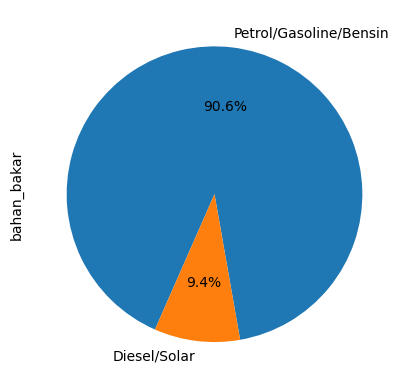

In [ ]:
bbm_counts = df['bahan_bakar'].value_counts()
bbm_counts.plot(kind='pie', autopct='%1.1f%%', startangle=280)

jika dilihat dari diagram pie diatas, dapat disimpulkana jika pengguna mobil yang menggunakan bahan bakar petrol/gasoline/bensin lebih banyak dibanding pengguna mobil yang menggunakan diesel/solar sebagai bahan bakar nya, yang dimana presentase bahan bakar petrol/gasoline/bensin adalah 90,6% dan presentaase bahan bakar diesel/solar adalah 9,4%. Mobil dengan mesin bensin cenderung memiliki harga yang lebih terjangkau dibandingkan dengan mobil dengan mesin diesel. Infrastruktur untuk bahan bakar petrol lebih luas dan lebih mudah diakses daripada bahan bakar diesel. Sehingga, pemilik mobil lebih memilih mobil dengan mesin bensin karena ketersediaan bahan bakar yang lebih baik. Biaya perawatan dan perbaikan untuk mobil dengan mesin bensin cenderung lebih murah daripada mobil dengan mesin diesel. itulah mengapa pengguna bahan bakar petrol/gasoline/bensin lebih banyak dibanding pengguna diesel/solar.

In [ ]:
import plotly.express as px

In [ ]:
px.imshow(df.corr(numeric_only=True))

dapat dilihat dari visualisasi korelasi diatas memiliki beberapa contoh misal:
* korelasi antara "pajak" dan juga "tahun" adalah -0,0714
* korelasi antara "ukuran_mesin" dan juga "mpg" adalah 0,838
* korelasi antara "harga" dan juga "tahun" adalah -0,078

<ipython-input-13-550238be559f>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'jumlah pengguna')

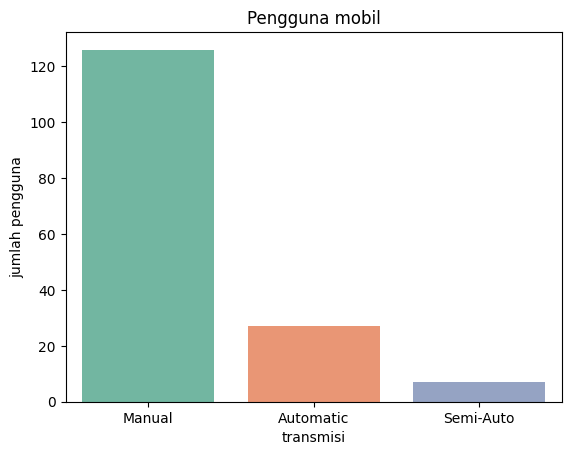

In [ ]:
sns.countplot(x='transmisi', data=df, palette='Set2')
plt.title('Pengguna mobil')
plt.xlabel('transmisi')
plt.ylabel('jumlah pengguna')

dari diagram diatas dapat ditarik kesimpulan jika, lebih banyak pengguna mobil yang memilih mesin mobil manual dibanding mesin yang otomatis maupun yang semi otomatis. itu dikarenakan masih banyaknya mobil mobil tua yang maasih banyak peminatnya dan juga mobil tua tersebut masih memiliki kontrol yang lebih baik atas kendaraan, pengalaman berkendara yang lebih interaktif, dan potensi efisiensi bahan bakar yang lebih baik dalam beberapa kasus.

##**Verify Data Quality**

####Missing Values

In [ ]:
pd.DataFrame(df.isna().sum() /len(df)*100, columns=['Null Ratio %'])

,Null Ratio %
no,0.0
model,0.0
tahun,0.0
harga,0.0
transmisi,0.0
jarak_tempuh,0.0
bahan_bakar,0.0
pajak,0.0
mpg,0.0
ukuran_mesin,0.0


jika dilihat dari presentasenya, pada setiap kolom adalah 0.0%, yang dimana menandakan jika semua kolom terisi, dan tidak ada nilai yang kosong.

####Outliers Values

In [ ]:
# Mendefinisikan fungsi untuk mendeteksi outliers dan menghitung persentase
def detect_outliers(column):
    # Convert the column to a numeric data type
    column = pd.to_numeric(column, errors='coerce')

    # Remove NaN values
    column = column.dropna()

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Detect outliers
    outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

    # Calculate the percentage of outliers
    percentage_outliers = outliers.sum() / len(column) * 100

    return outliers, percentage_outliers


# Loop untuk setiap kolom
for column in df.columns:
    outliers, percentage_outliers = detect_outliers(df[column])

    print(f"Kolom '{column}':")
    print(f"  - Jumlah outliers: {outliers.sum()}")
    print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
    print()

Kolom 'no':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'model':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'tahun':
  - Jumlah outliers: 3
  - Persentase kehadiran outliers: 1.88%

Kolom 'harga':
  - Jumlah outliers: 11
  - Persentase kehadiran outliers: 6.88%

Kolom 'transmisi':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'jarak_tempuh':
  - Jumlah outliers: 13
  - Persentase kehadiran outliers: 8.12%

Kolom 'bahan_bakar':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'pajak':
  - Jumlah outliers: 5
  - Persentase kehadiran outliers: 3.12%

Kolom 'mpg':
  - Jumlah outliers: 28
  - Persentase kehadiran outliers: 17.50%

Kolom 'ukuran_mesin':
  - Jumlah outliers: 27
  - Persentase kehadiran outliers: 16.88%



<ipython-input-15-fd1453793905>:17: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-15-fd1453793905>:17: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-15-fd1453793905>:17: RuntimeWarning:

invalid value encountered in scalar divide



* Kolom 'tahun' memiliki 3 outliers, yang merupakan kendaraan dengan tahun pembuatan yang jauh dari rentang yang umum. Persentase kehadiran outliers sebesar 1.88%.
* Kolom 'harga' memiliki 11 outliers, yang mungkin disebabkan oleh harga yang tidak masuk akal atau ekstrim. Persentase kehadiran outliers sebesar 6.88%.
* Kolom 'jarak_tempuh' memiliki 13 outliers, yang mungkin disebabkan oleh kesalahan dalam pencatatan atau kendaraan dengan jarak tempuh yang tidak wajar. Persentase kehadiran outliers sebesar 8.12%.
* Kolom 'pajak' memiliki 5 outliers, yang mungkin disebabkan oleh nilai pajak yang tidak sesuai dengan nilai yang umum. Persentase kehadiran outliers sebesar 3.12%.
* Kolom 'mpg' memiliki 28 outliers, yang mungkin disebabkan oleh kesalahan dalam pengukuran atau pencatatan, atau karena kendaraan yang memiliki konsumsi bahan bakar yang tidak masuk akal. Persentase kehadiran outliers sebesar 17.50%.
* Kolom 'ukuran_mesin' memiliki 27 outliers, yang mungkin disebabkan oleh kesalahan dalam pengukuran atau pencatatan, atau karena kendaraan dengan ukuran mesin yang tidak umum. Persentase kehadiran outliers sebesar 16.88%.

####Duplicated Values

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
155    False
156    False
157    False
158    False
159    False
Length: 160, dtype: bool

In [ ]:
df[df.duplicated()]

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin


dapat dilihat dari 2 duplikat diatas, yang dimana pada yanag pertama semua baris bernilai false atau salah, lalu pada duplicate yang kedua tidak ada data yanag muncul, maka menandakan bahwa tidak ada data yang terduplikat dan juga menandakan bahwa tidak ada daata yang sama.

# Data Cleaning

In [106]:
print((df.isna().sum() / len(df)) * 100)

no              0.0
model           0.0
tahun           0.0
harga           0.0
transmisi       0.0
jarak_tempuh    0.0
bahan_bakar     0.0
pajak           0.0
mpg             0.0
ukuran_mesin    0.0
dtype: float64


In [125]:
pd.DataFrame(df.isna().sum() /len(df)*100, columns=['Null Ratio %'])

,Null Ratio %
no,0.0
model,0.0
tahun,0.0
harga,0.0
transmisi,0.0
jarak_tempuh,0.0
bahan_bakar,0.0
pajak,0.0
mpg,0.0
ukuran_mesin,0.0


In [126]:
df[df['model'].isnull()]

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin


In [127]:
df[df['pajak'].isnull()]

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin


In [128]:
df[df['no'].isnull()]

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin


In [129]:
df[df['bahan_bakar'].isnull()]

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin


In [130]:
df[df['mpg'].isnull()]

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin


In [131]:
df[df.duplicated()]

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin


In [148]:
df = df.drop_duplicates()

In [149]:
df

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin
3,4,Toyota Agya,2020,136000000,Manual,24089,Petrol/Gasoline/Bensin,1725250,20.0,1.0
4,5,Toyota Agya,2017,200000000,Manual,19400,Petrol/Gasoline/Bensin,1200000,22.0,1.2
6,7,Daihatsu Ayla,2014,117000000,Manual,68000,Petrol/Gasoline/Bensin,1000000,22.0,1.0
7,8,Mitsubishi Mirage,2012,173000000,Automatic,150000,Petrol/Gasoline/Bensin,2400000,20.0,1.2
8,9,Toyota Avanza G,2010,180000000,Manual,20810,Petrol/Gasoline/Bensin,200000,26.0,1.6
...,...,...,...,...,...,...,...,...,...,...
153,154,Daihatsu Gran Max,2018,225000000,Manual,28321,Petrol/Gasoline/Bensin,3200000,22.0,1.5
154,155,Toyota Avanza,2018,235000000,Automatic,14000,Petrol/Gasoline/Bensin,3200000,23.0,1.3
155,156,Mitsubishi L300,2022,224000000,Manual,21000,Diesel/Solar,3200000,22.0,1.5
156,157,Daihatsu Grand Max Delvan,2018,148000000,Manual,20219,Petrol/Gasoline/Bensin,2000000,25.0,1.3


In [150]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
no,0.000000
tahun,0.729927
harga,0.000000
jarak_tempuh,8.759124
pajak,2.189781
mpg,0.000000
ukuran_mesin,10.948905


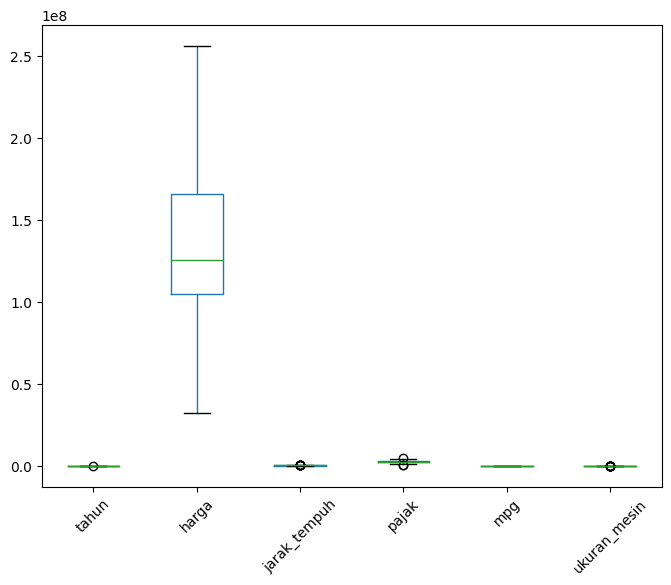

In [152]:
boxplot = df.drop('no', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Hapus Outliers

In [140]:
Q1 = df['harga'].quantile(0.25)
Q3 = df['harga'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['harga'] >= lower_bound) & (df['harga'] <= upper_bound)]

penghapusan outliers dapat dilakukan jika presentase nya <= 10% (kurang dari atau sama dengan 10 persen).

# Imputasi Outliers

In [141]:
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['mpg']=np.where(df['mpg']>upper_whisker,upper_whisker,np.where(df['mpg']<lower_whisker,lower_whisker,df['mpg']))

Imputasi digunakan jika presentae outliers >= 10% ( lebih dari atau sama dengan 10%). Presentase outliers yang diatas 10%, memiliki 2 opsi yang mungkin ssaja dapat dipilih, yanng pertama adalah mengabaikan, dan yang kedua menggunakan alternatif laim yaitu dengan imputasi.

In [144]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
no,0.000000
tahun,0.729927
harga,0.000000
jarak_tempuh,8.759124
pajak,2.189781
mpg,0.000000
ukuran_mesin,10.948905


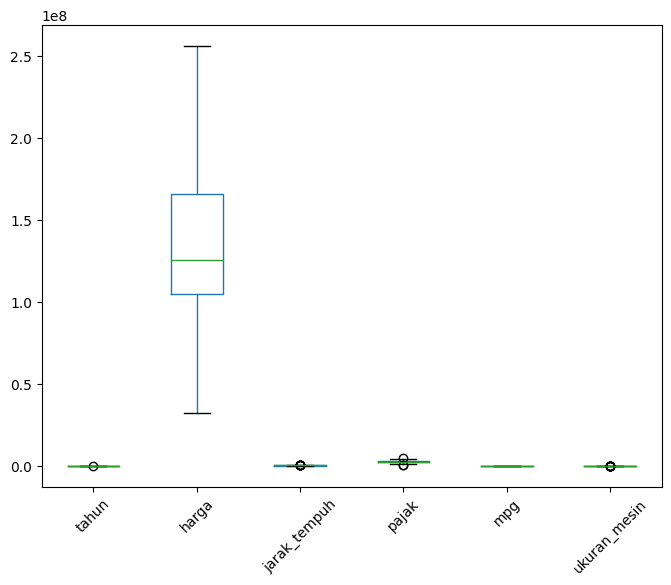

In [153]:
boxplot = df.drop('no', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

# Construct Data

Rekayasa Fitur

In [154]:
def kategori_ukuran_mesin(size):
    if size < 2.0:
        return 'Kecil'
    elif 2.0 <= size < 3.0:
        return 'Medium'
    else:
        return 'Besar'
df['Kategori_Mesin'] = df['ukuran_mesin'].apply(kategori_ukuran_mesin)

Menggunakan rekayasa fitur untuk menambahkan kolom kategori ukuran mesin, yang digunakan untuk mengetahui ukuran mesin pada sebuahmobil termasuk ke dalam kategori kecil, sedang, atau besar.

In [155]:
df.head()

,no,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin,Kategori_Mesin
3,4,Toyota Agya,2020,136000000,Manual,24089,Petrol/Gasoline/Bensin,1725250,20.0,1.0,Kecil
4,5,Toyota Agya,2017,200000000,Manual,19400,Petrol/Gasoline/Bensin,1200000,22.0,1.2,Kecil
6,7,Daihatsu Ayla,2014,117000000,Manual,68000,Petrol/Gasoline/Bensin,1000000,22.0,1.0,Kecil
7,8,Mitsubishi Mirage,2012,173000000,Automatic,150000,Petrol/Gasoline/Bensin,2400000,20.0,1.2,Kecil
8,9,Toyota Avanza G,2010,180000000,Manual,20810,Petrol/Gasoline/Bensin,200000,26.0,1.6,Kecil


#Data Reduction

In [156]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [157]:
df = df.drop(['no'], axis=1)

In [158]:
df.head()

,model,tahun,harga,transmisi,jarak_tempuh,bahan_bakar,pajak,mpg,ukuran_mesin,Kategori_Mesin
3,Toyota Agya,2020,136000000,Manual,24089,Petrol/Gasoline/Bensin,1725250,20.0,1.0,Kecil
4,Toyota Agya,2017,200000000,Manual,19400,Petrol/Gasoline/Bensin,1200000,22.0,1.2,Kecil
6,Daihatsu Ayla,2014,117000000,Manual,68000,Petrol/Gasoline/Bensin,1000000,22.0,1.0,Kecil
7,Mitsubishi Mirage,2012,173000000,Automatic,150000,Petrol/Gasoline/Bensin,2400000,20.0,1.2,Kecil
8,Toyota Avanza G,2010,180000000,Manual,20810,Petrol/Gasoline/Bensin,200000,26.0,1.6,Kecil


kolom "no" dihapus atau dikurangi karena hanya berfungsi sebagai indeks untuk setiap baris dalam tabel dan tidak memberikan informasi yang berguna atau relevan tentang mobil itu sendiri.

# Data Transformation

In [164]:
df2 ['transmisi'] = df2['transmisi'].map({'Manual' : 0, 'Auttomatic' : 1})
df2 ['Kategori_Mesin'] = df2['Kategori_Mesin'].map({'Kecil' : 0, 'Medium' : 1, 'Besar' : 2})

NameError: name 'df2' is not defined

In [165]:
df.to_csv('Data Cleaned.csv', index=False)